# Formalized Problem
    1. Given a gene matrix, correct for gene expression drop otu

# Create Data for PCA

In [1]:
import numpy as np
import math
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA as sklearnPCA


Populating the interactive namespace from numpy and matplotlib


# Create Cell Data

In [2]:
np.random.seed(4294967295) # random seed for consistency

# Cell 1 Data

In [106]:
#Set parameters
mean_cell1 = [8,8,8,8,7,7,9,7,8,8]
cov = np.identity(10) 
cell1 = np.random.multivariate_normal(mean_cell1, cov, 30)
shape(cell1)

(30, 10)

# Cell 2 Data

In [107]:
mean_cell2 = [4,4,2,3,4,3,4,5,4,4]
cov = np.identity(10) 
cell2 = np.random.multivariate_normal(mean_cell2, cov, 30)
shape(cell2)


(30, 10)

# Cell 3 Data

In [108]:
mean_cell3 = [0,1,1,2,1,0,1,1,2,2]
cov = np.identity(10) 
cell3 = np.random.multivariate_normal(mean_cell3, cov, 30)
shape(cell3)

(30, 10)

# Dimension Viz + Plot without Drop Out 

In [119]:
#Cell PCA
#feature space/genes = 10, samples = 90
#each element is the level of expression (log read count) of the jth gene, ith sample

t = np.concatenate((cell1, cell2, cell3),)
print shape(t)
pca1 = sklearnPCA(n_components=5)
fitted1 = pca1.fit(t)
trans1 = pca1.transform(t)
shape(trans1)

(90, 10)


(90, 5)

In [110]:
# #Cell 2 PCA
# pca2 = sklearnPCA(n_components=10)
# fitted2 = pca2.fit(cell2)
# trans2 = pca2.transform(cell2) 

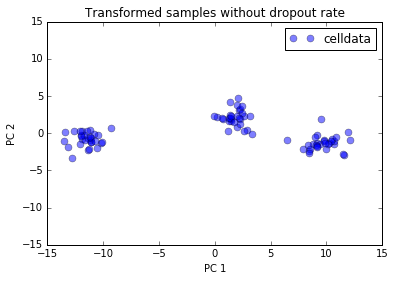

In [111]:
plt.plot(trans1[:,0], trans1[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='celldata')
#plt.plot(trans2[:,0], trans2[:,1], '^', markersize=7, color='red', alpha=0.5, label='cell2')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.xlim([-15,15])
plt.ylim([-15,15])
plt.legend()
plt.title('Transformed samples without dropout rate')

plt.show()

In [112]:
trans1[:,1]

array([-0.23316383, -0.30869411, -0.11665085,  0.69953386,  0.42248976,
       -0.96678886, -1.22469783, -0.77301821, -1.477204  , -1.06425889,
       -0.69659406, -0.61638165,  0.24439628, -1.1798189 , -2.30507036,
        0.24519629, -0.95701653, -0.46949311, -1.36761843, -1.83792262,
       -1.94359267, -1.03749372, -0.27709268, -0.31337866, -2.14540754,
       -3.3391291 ,  0.32023871,  0.28559193,  0.17694161, -1.21890807,
        3.18185469,  3.31570023,  2.20089583,  0.29155573,  1.89713408,
        1.95620799,  0.88013391,  2.33709128,  1.9655611 ,  4.7099501 ,
        2.26541764,  1.67374326,  1.24250756,  1.67780465,  2.26065963,
        0.41343231,  3.73829609,  2.69733939,  1.98876608,  2.43472412,
        4.2516874 ,  2.06360773,  2.07235404,  2.28904265, -0.10020287,
        1.99600032,  1.52254634,  0.29721636,  2.34944784,  3.59717233,
       -1.37953472, -1.44536952, -1.51365343, -0.25801362, -1.01000946,
       -1.50145515, -1.5962486 ,  0.14278429, -0.97345245, -2.13

# Drop out rate parameters

In [129]:
#mu is the mean vector aka centroid
def drop_out(exp):
    p = math.e**(-.1 * exp**2)
    return np.random.binomial(1, p, 1)[0]

In [130]:
noise_1 = .1 * np.random.randn(shape(t)[0], shape(t)[1]) 
# noise_2 = .1 * np.random.randn(shape(cell2)[0], shape(cell2)[1]) 

In [131]:
nsd1 = np.copy(t) + np.copy(noise_1)
#nsd2 = np.copy(cell2) + np.copy(noise_2)

In [132]:
count = 0
for (i,j), value in numpy.ndenumerate(nsd1):
    if (drop_out(value) == 1):
        count += 1
        nsd1[i,j] = 0
print count

342


In [133]:
shape(nsd1)

(90, 10)

In [134]:
nsd1

array([[  8.71756476,   7.41966421,   7.84841081,   8.06106977,
          8.09707229,   7.06698628,   9.25250314,   6.849659  ,
          7.82316931,   7.89703802],
       [  7.76947104,   6.39677202,   6.84111947,   7.79015147,
          7.20048624,   7.81003976,   9.08530092,   6.30589603,
          7.38320015,   7.86295603],
       [  7.05477619,   8.57923986,   7.19999229,   8.41160252,
          6.64268328,   5.79005019,   9.08864476,   7.93435268,
          8.07084993,   6.94865458],
       [  6.64345628,   7.50319829,   6.76425339,   6.46936686,
          7.18774503,   4.96181977,   9.54063412,   7.36948207,
          7.04497078,   7.34318929],
       [  9.03469186,   6.50311542,   7.9174532 ,   6.95550253,
          5.92613966,   6.54478648,   9.4118222 ,   7.81474099,
          8.33345176,   7.34150107],
       [  8.27518128,   8.24693373,   7.22783167,   8.0677407 ,
          7.08509357,   6.33958122,   8.17441388,   5.87957239,
          8.67303541,   8.22384527],
       [  

# With Dropout Visualization

In [137]:
#Cell PCA
#feature space = 90, samples = 10
pca2 = sklearnPCA(n_components=5)
fitted1 = pca2.fit(nsd1)
trans2 = pca1.transform(nsd1)
shape(trans2)

(90, 5)

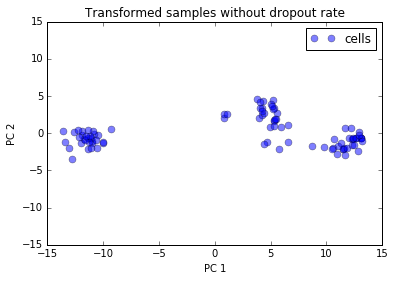

In [138]:
plt.plot(trans2[:,0], trans2[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='cells')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.xlim([-15,15])
plt.ylim([-15,15])
plt.legend()
plt.title('Transformed samples without dropout rate')

plt.show()

In [126]:
trans2[:,0]

array([  6.34234262,   9.64011131,   0.62964911,   1.24164057,
         4.7659998 ,   6.11929852,   2.19147685,   3.72038935,
         1.95230652,   3.13398982,  -2.71253104,   8.44854873,
         7.13612209,   2.27915619,  -4.78519053,   0.12456677,
         3.07691727,   3.76882395,   8.76033712,  -6.8542574 ,
         5.69809928,  -1.3701777 ,  -3.15459602,   2.66825074,
         8.927798  ,  -2.3100824 ,   1.56081316,   8.58607774,
         5.40957441,  10.1844654 ,  13.07182318,  13.07182318,
        13.07182318,  13.07182318,  11.78859629,  10.14125432,
        10.2798071 ,   8.76789611,   9.07692122,  11.28090186,
        13.07182318,  13.07182318,  11.89068287,  11.30118412,
         8.81478189,  10.38162016,  13.07182318,  13.07182318,
        10.51757376,  11.90272638,   7.34286619,  11.21000177,
        11.79764733,  11.78862205,  11.61483288,  13.07182318,
        13.07182318,  12.09535808,  10.189975  ,  13.07182318,
        12.30077905,  12.5192522 ,  13.07182318,  13.07